In [1]:
import pandas as pd
import tensorflow as tf
import torch
import numpy as np
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from transformers import AutoModel
from sentence_transformers import SentenceTransformer

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [2]:
import pandas as pd

df = pd.read_csv("/content/7allV03.csv")
label_encoder = LabelEncoder()
df["category"] = label_encoder.fit_transform(df["category"])
df['text'] = df['text'].astype(str)
df['text'] = df['text'].fillna('').astype(str)


In [3]:
# Get the count of samples for each class in df
class_counts = df['category'].value_counts()
# Print the counts
print(class_counts)

category
4    700
0    700
1    700
2    700
3    700
5    700
6    700
Name: count, dtype: int64


In [4]:
models = []
embeddings_dict = {}

jinaEmbed = SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True)
task = "classification"
embeddings1 = jinaEmbed.encode(df['text'].tolist(), task=task, prompt_name=task, batch_size=8)
embeddings_dict['jina'] = embeddings1

e5Embed = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
embeddings2 = e5Embed.encode(df['text'].tolist())
embeddings_dict['e5'] = embeddings2

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/734k [00:00<?, ?B/s]

custom_st.py:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v3:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- xlm_padding.py
- mha.py
- embedding.py
- mlp.py
- block.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was down

model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression


def generate_improved_features(embeddings, labels, f=2, k=2, target_size_multiplier=2, transformations=None):
    n_samples, n_original_features = embeddings.shape
    num_new_features = int((target_size_multiplier - 1) * n_original_features)

    new_features = []
    recorded_transformations = []

    for _ in range(num_new_features):
        if transformations is None: #training
            # Training: Randomly select features and compute weights
            selected_indices = np.random.choice(n_original_features, f, replace=False)
            selected_features = embeddings[:, selected_indices]
            design_matrix = np.hstack([np.ones((n_samples, 1)), selected_features])
            lr = LinearRegression().fit(design_matrix, labels)
            weights = lr.coef_
            # Save transformation details
            recorded_transformations.append((selected_indices, weights))
        else:
            # Testing: Use saved transformations
            selected_indices, weights = transformations.pop(0)
            selected_features = embeddings[:, selected_indices]
            design_matrix = np.hstack([np.ones((n_samples, 1)), selected_features])

        # Generate the new feature
        new_feature = design_matrix @ weights
        new_features.append(new_feature)

    improved_embeddings = np.hstack([embeddings, np.array(new_features).T])
    return (improved_embeddings, recorded_transformations) if transformations is None else improved_embeddings



labels = df['category'].values
# Concatenate the embeddings
concatenated_embeddings = np.hstack([embeddings1, embeddings2])
embeddings_dict['concatanated'] = concatenated_embeddings

embeddings_dict['improved_1.5x'] = concatenated_embeddings #demo assigning, improved embeddings will be created in the method
embeddings_dict['improved_2x'] = concatenated_embeddings   #demo assigning, improved embeddings will be created in the method
embeddings_dict['improved_3x'] = concatenated_embeddings   #demo assigning, improved embeddings will be created in the method
embeddings_dict['improved_5x'] = concatenated_embeddings   #demo assigning, improved embeddings will be created in the method


In [ ]:
embeddings_dict['e5'].shape

(10500, 1024)

In [6]:
#firstly training the svm's with each embedding models
#--==--==--==--==--==--==--==--==
svm_models = {}
predictions_SMVS = {}

rf_models = {}
predictions_RF = {}

mlp_models = {}
predictions_MLP = {}

for model_name, embeddings in embeddings_dict.items():

    # Splitting the data initially
    X_train, X_test, y_train, y_test = train_test_split(
      embeddings, df['category'].values, test_size=0.2, random_state=42
    )

    # Adjusting split for specific models
    if model_name not in ['jina', 'e5']:
        X_train, X_test, y_train, y_test = train_test_split(
            embeddings_dict['concatanated'], df['category'].values, test_size=0.2, random_state=42
        )

    # Handle improved embeddings based on model name
    improved_multipliers = {
        'improved_1.5x': 1.5,
        'improved_2x': 2.0,
        'improved_3x': 3.0,
        'improved_5x': 5.0
    }

    if model_name in improved_multipliers:
        multiplier = improved_multipliers[model_name]
        X_train, transformations = generate_improved_features(X_train, y_train, f=2, k=1, target_size_multiplier=multiplier)
        X_test = generate_improved_features(X_test, None, f=2, k=1, target_size_multiplier=multiplier, transformations=transformations)


    # Train SVM
    #=================================================
    start_time = time.time()
    svm = SVC(probability=True, random_state=42)
    svm.fit(X_train, y_train)
    end_time = time.time()

    # Save the model
    svm_models[model_name] = svm
    print(f"{model_name} - Training and Testing Time SVM: {end_time - start_time:.2f} seconds")


    # Get predictions
    preds = svm.predict(X_test)
    predictions_SMVS[model_name] = preds
    print(f"{model_name} SVM Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))
    #=================================================

    #Train MLP
    #=================================================
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
    mlp.fit(X_train, y_train)
    end_time = time.time()

    # Save the model
    mlp_models[model_name] = mlp
    print(f"{model_name} - Training and Testing Time MLP: {end_time - start_time:.2f} seconds")


    # Get predictions
    preds = mlp.predict(X_test)
    predictions_MLP[model_name] = preds

    print(f"{model_name} Accuracy MLP: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))
    #=================================================



jina - Training and Testing Time SVM: 15.84 seconds
jina SVM Accuracy: 0.9286
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       131
           1       0.88      0.91      0.90       142
           2       0.93      0.96      0.95       139
           3       0.95      0.97      0.96       122
           4       0.93      0.89      0.91       158
           5       0.99      1.00      0.99       147
           6       0.92      0.94      0.93       141

    accuracy                           0.93       980
   macro avg       0.93      0.93      0.93       980
weighted avg       0.93      0.93      0.93       980

jina - Training and Testing Time MLP: 16.29 seconds
jina Accuracy MLP: 0.9112
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       131
           1       0.84      0.87      0.85       142
           2       0.94      0.95      0.95       139
           3       0.96      0

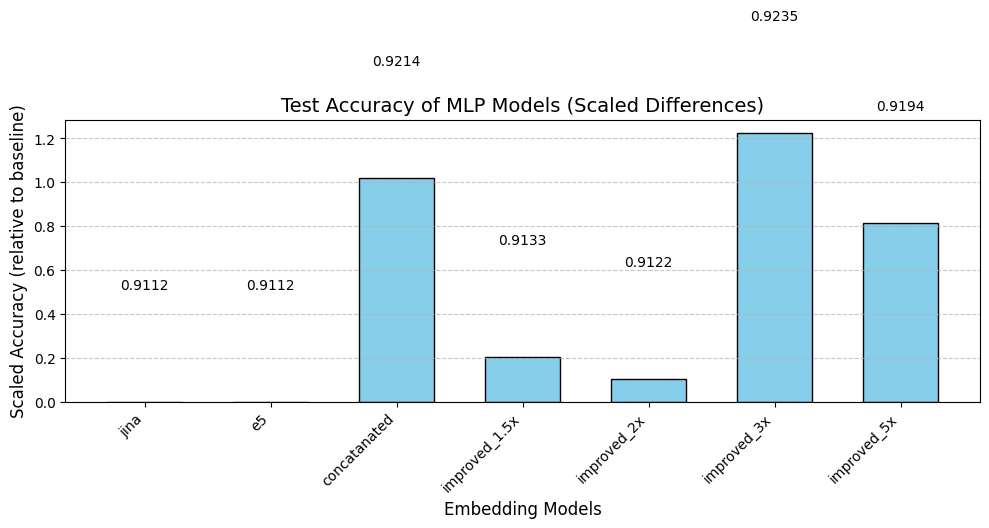

In [7]:
import matplotlib.pyplot as plt

# Example data: Model names and accuracies
model_names = list(predictions_MLP.keys())
accuracies = [accuracy_score(y_test, preds) for preds in predictions_MLP.values()]

# Scale the accuracies (e.g., subtract a baseline and multiply by a factor)
baseline = min(accuracies)  # Set the baseline to the minimum accuracy
scale_factor = 100  # Scaling factor to exaggerate differences
scaled_accuracies = [(acc - baseline) * scale_factor for acc in accuracies]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scaled_accuracies, color='skyblue', edgecolor='black', width=0.6)

# Add data labels above the bars for scaled values
for bar, scaled_accuracy, original_accuracy in zip(bars, scaled_accuracies, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{original_accuracy:.4f}', ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Embedding Models', fontsize=12)
plt.ylabel('Scaled Accuracy (relative to baseline)', fontsize=12)
plt.title('Test Accuracy of MLP Models (Scaled Differences)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


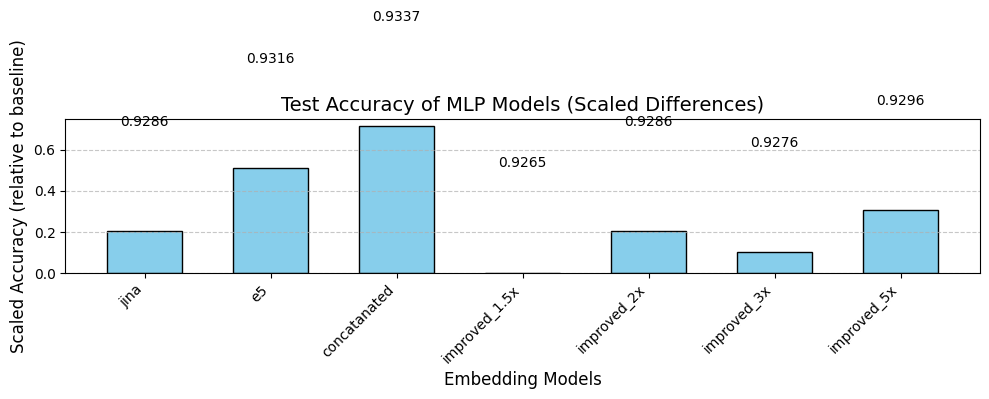

In [8]:
import matplotlib.pyplot as plt

# Example data: Model names and accuracies
model_names = list(predictions_SMVS.keys())
accuracies = [accuracy_score(y_test, preds) for preds in predictions_SMVS.values()]

# Scale the accuracies (e.g., subtract a baseline and multiply by a factor)
baseline = min(accuracies)  # Set the baseline to the minimum accuracy
scale_factor = 100  # Scaling factor to exaggerate differences
scaled_accuracies = [(acc - baseline) * scale_factor for acc in accuracies]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scaled_accuracies, color='skyblue', edgecolor='black', width=0.6)

# Add data labels above the bars for scaled values
for bar, scaled_accuracy, original_accuracy in zip(bars, scaled_accuracies, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{original_accuracy:.4f}', ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Embedding Models', fontsize=12)
plt.ylabel('Scaled Accuracy (relative to baseline)', fontsize=12)
plt.title('Test Accuracy of MLP Models (Scaled Differences)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()